In [21]:
import numpy as np
import pandas as pd
from scipy.sparse import load_npz
from sklearn.preprocessing import StandardScaler
import umap
import hdbscan

# Загрузка данных
train = load_npz("data/train.npz")

# Преобразуем в плотную матрицу (требует памяти!)
X_dense = train.toarray()

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dense)


In [51]:
umap_model = umap.UMAP(
    n_components=10,
    random_state=42,
    n_neighbors=30, 
    min_dist=0.1)

# Применяем UMAP
X_umap = umap_model.fit_transform(X_scaled)

C:\WORK_DIRECTORY\PREP-to-JOB\Python-FW\Pandas-example\pythonProject\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\WORK_DIRECTORY\PREP-to-JOB\Python-FW\Pandas-example\pythonProject\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [52]:
# Создаем объект HDBSCAN
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=50,      # Минимальный размер кластера
    min_samples=10,           # Чувствительность к шуму
    metric='euclidean',       # Метрика расстояния
    cluster_selection_method='eom'  # 'eom' или 'leaf'
)

# Применяем HDBSCAN
labels = clusterer.fit_predict(X_umap)

C:\WORK_DIRECTORY\PREP-to-JOB\Python-FW\Pandas-example\pythonProject\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\WORK_DIRECTORY\PREP-to-JOB\Python-FW\Pandas-example\pythonProject\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


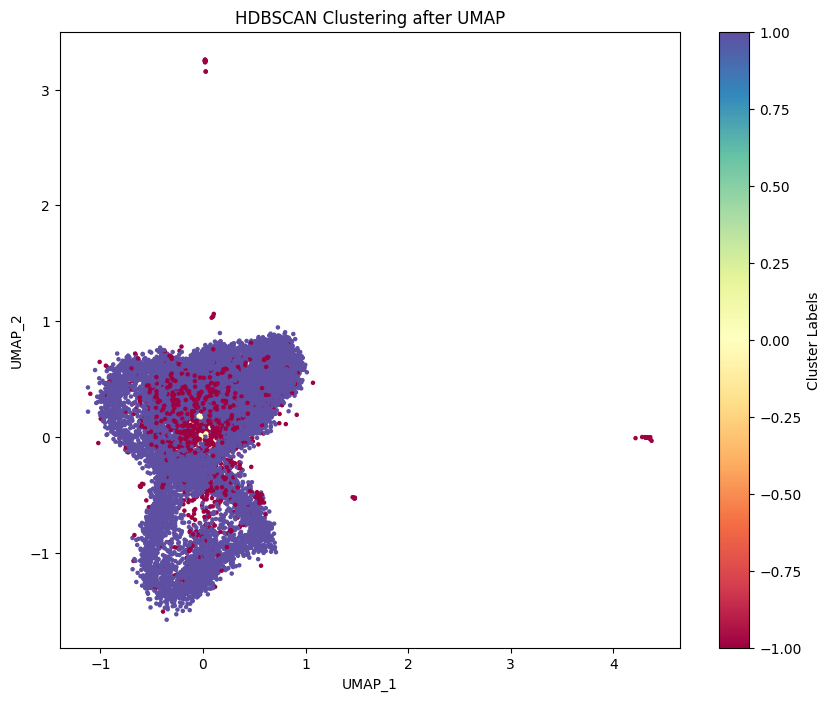

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap="Spectral", s=5)
plt.title("HDBSCAN Clustering after UMAP")
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.colorbar(label="Cluster Labels")
plt.show()

In [54]:
# Вычисление метрик
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette = silhouette_score(X_scaled, labels)

# Calinski-Harabasz Score
calinski = calinski_harabasz_score(X_scaled, labels)

# Davies-Bouldin Score
davies = davies_bouldin_score(X_scaled, labels)

print()
print(f"CHS (+): {calinski:.2f}")
print(f"DBSe (-): {davies:.4f}")
print(f"SS (-1, 1): {silhouette:.4f}")


CHS (+): 3.71
DBSe (-): 38.5271
SS (-1, 1): 0.0266


In [18]:
# Создание DataFrame
submission = pd.DataFrame({
    "ID": range(len(labels)),
    "TARGET": labels
})

# Сохранение файла
submission.to_csv("submission_submit_2.csv", index=False)